## Logistic Regression

- Logistic regression is one of the most popular classification methods.

- Although the name contains regression, and the underlying method is the same as that for linear regression, it is not a regression method. That is, it is not used for prediction of continuous (numeric) values. 

- The purpose of the **logistic regression method is to predict the outcome, which is categorical.**

- In the logistic regression we apply logistic function to the linear equation , in sense to obtain probabilities

Given a multi-class equation

$$y = m_1 x_1 + m_2 x_3 + m_3 x_3 + ... +  m_n x_n + b $$

$$ p(y=1)= 1 / e^{( m_1 x_1 + m_2 x_3 + m_3 x_3 + ... +  m_n x_n + b)} $$

where **x** are different inputs, $m_1...n$ are the slopes and *b* is the intercept.

At the end we obtain a sigmoid curve between 0,1.

$$f(x) = \frac{1}{1+e^{x}}$$

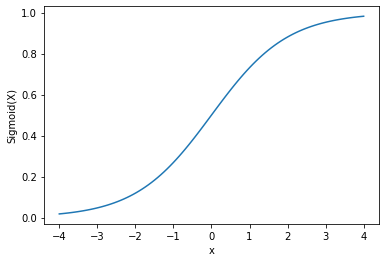

In [1]:
# Import matplotlib, numpy and math 
import matplotlib.pyplot as plt 
import numpy as np 
import math 

# Generate input data 
x = np.linspace(-4, 4, 100) 

# Sigmoid curve
z = 1/(1 + np.exp(-x)) 

# Plot Sigmoid Curve
plt.plot(x, z) 
plt.xlabel("x") 
plt.ylabel("Sigmoid(X)") 
  
plt.show() 

To implement Logistic Regression we use the `LinearCLassifier` 

## Problem Description 

### Dataset

The dataset chosen was Iris dataset that is compounded by 
- features: SepalLength	SepalWidth	PentalLength	PentalWidth	
- targets: Species

The dataset has three types fo species. But only for demonstration (it is not for multiclass classification) we will work only with two species classes.

The objective is through Logic Regression make prediction of species type using the dataset features.

### Data Transformation

Through Exploratory Data Analysis we saw the bimodal distribution in target due to we selected only two species. We can see the correlation between each feature with target.

The dataset was split into train and test dataset. The train dataset represents 80% of dataset and the test dataset represents 20% of all dataset.

Data normalization was implemented, because it is a very recommend procedure when we have features with different value range. 

### TensorFlow Pipeline
A TensorFlow pipeline was built to slice, shuffle and create batch of data for generate train and test dataset for Logistic model.

### Model Verification
To verify the model performance to make predictions of two different species was implemented: accuracy, precision, recall. All metrics gaves values around 95%.

### Load Libraries

In [36]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pandas as pd
import seaborn as sb
import tensorflow as tf
from tensorflow import keras as ks

from tensorflow.estimator import LinearClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

### Load dataset

The dataset is the well known Iris, that cathegorize four species of plants. The dataset is compound by features:
- Sepal Length
- Sepal Width
- Petal Length
- Petal Witdth

and the categorical targets (species) are:
- Setosa
- Versicolor
- Virginica

Here we are predicting only two species

In [22]:
# Define columns names
col_names = ['SepalLength', 'SepalWidth', 'PentalLength', 'PentalWidth', 'Species']
target_dimensions = ['Setosa', 'Versicolor', 'Virginica']

# Load dataset
# Define the path to read the dataset
training_data_path = tf.keras.utils.get_file("iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_data_path = tf.keras.utils.get_file("iris_test.csv","https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

# Train dataset
# We are not interest in the original dataset header (header = 0)
training = pd.read_csv(training_data_path, names=col_names, header=0)

# Select the Species that not contains zero
training = training[training['Species'] >= 1]

# replace the Species values from 1,2 to 0,1
training['Species'] = training['Species'].replace([1,2], [0,1])

# Test dataset
# We are not interest in the original dataset header (header = 0)
test = pd.read_csv(test_data_path, names=col_names,header=0)

# Select the Species that not contains zero
test = test[test['Species'] >= 1]

# Replace the Species values from 1,2 to 0,1
test['Species'] = test['Species'].replace([1,2], [0,1])

In [14]:
training.head()

,SepalLength,SepalWidth,PentalLength,PentalWidth,Species
0,5.0,2.3,3.3,1.0,0
1,4.9,2.5,4.5,1.7,1
6,6.9,3.1,5.1,2.3,1
7,6.7,3.1,4.4,1.4,0
9,5.2,2.7,3.9,1.4,0


In [15]:
test.head()

,SepalLength,SepalWidth,PentalLength,PentalWidth,Species
0,5.9,3.0,4.2,1.5,1
1,6.9,3.1,5.4,2.1,2
2,5.1,3.3,1.7,0.5,0
3,6.0,3.4,4.5,1.6,1
4,5.5,2.5,4.0,1.3,1


In [23]:
# Reset the index of dataframes
training.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

# Concatenate two dataframes through rows
iris_dataset = pd.concat([training, test], axis=0)

# Output stats 
iris_stats = iris_dataset.describe()

# Put the dataframe in a better configuration to read
iris_stats = iris_stats.transpose()

# Show the statics results
iris_stats

,count,mean,std,min,25%,50%,75%,max
SepalLength,100.0,6.262,0.662834,4.9,5.800,6.3,6.700,7.9
SepalWidth,100.0,2.872,0.332751,2.0,2.700,2.9,3.025,3.8
PentalLength,100.0,4.906,0.825578,3.0,4.375,4.9,5.525,6.9
PentalWidth,100.0,1.676,0.424769,1.0,1.300,1.6,2.000,2.5
Species,100.0,0.500,0.502519,0.0,0.000,0.5,1.000,1.0


## EDA Exploratory Data Analysis

BY the plot we can observe the distribution function of the each feature and target. In special tarhet shows us the bimodal distribution because it only have two values (0 and 1).

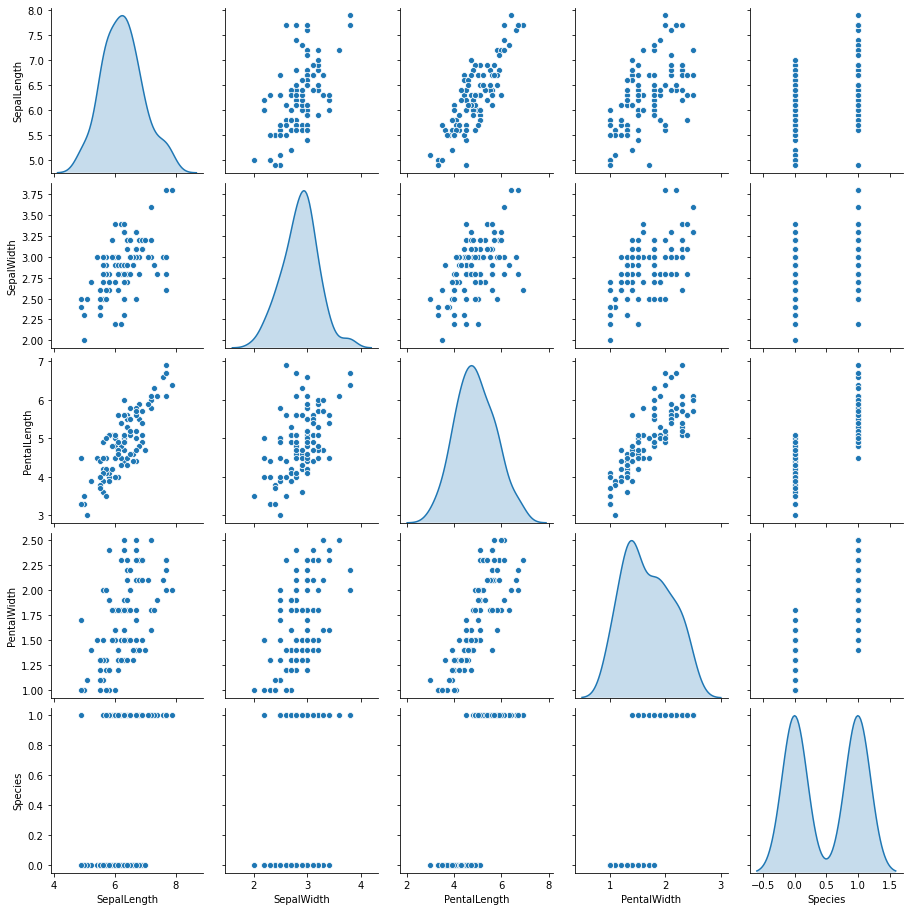

In [24]:
sb.pairplot(iris_dataset, diag_kind="kde")

In [25]:
correlation_data = iris_dataset.corr()
correlation_data.style.background_gradient(cmap='coolwarm',axis=None)

,SepalLength,SepalWidth,PentalLength,PentalWidth,Species
SepalLength,1.000000,0.553855,0.828479,0.593709,0.494305
SepalWidth,0.553855,1.000000,0.519802,0.566203,0.308080
PentalLength,0.828479,0.519802,1.000000,0.823348,0.786424
PentalWidth,0.593709,0.566203,0.823348,1.000000,0.828129
Species,0.494305,0.308080,0.786424,0.828129,1.000000


## Split in train and test

In [30]:
## Select the require dataset
X_data = iris_dataset[[i for i in iris_dataset.columns if i not in ['Species']]]
Y_data = iris_dataset[['Species']]

# Split dataset in training and test
training_features, test_features, training_labels, test_labels = train_test_split(X_data , Y_data , test_size=0.2)

print('No. of rows in Training Features: ', training_features.shape[0])
print('No. of rows in Test Features: ', test_features.shape[0])
print('No. of columns in Training Features: ', training_features.shape[1])
print('No. of columns in Test Features: ', test_features.shape[1])
print('No. of rows in Training Label: ', training_labels.shape[0])
print('No. of rows in Test Label: ', test_labels.shape[0])
print('No. of columns in Training Label: ', training_labels.shape[1])
print('No. of columns in Test Label: ', test_labels.shape[1])

No. of rows in Training Features:  80
No. of rows in Test Features:  20
No. of columns in Training Features:  4
No. of columns in Test Features:  4
No. of rows in Training Label:  80
No. of rows in Test Label:  20
No. of columns in Training Label:  1
No. of columns in Test Label:  1


In [31]:
## Normalize dataset
def norm(x):
    stats = x.describe()
    stats = stats.transpose()
    
    return (x - stats['mean']) / stats['std']

normed_train_features = norm(training_features)
normed_test_features = norm(test_features)

## Build the input pipeline for the TensorFlow model

In [34]:
def feed_input(features_dataframe, target_dataframe, shuffle=True, num_of_epochs=10, batch_size=32):
    # This function allows to shuffle dataset and create batchs of dataset for each epoch
    def input_feed_function():
        #  get the slices of an array in the form of objects
        dataset = tf.data.Dataset.from_tensor_slices((dict(features_dataframe), target_dataframe))
        
        # Shuffle dataset in which X is the number of samples randomized 
        if shuffle:
            dataset = dataset.shuffle(2000)
            
        dataset = dataset.batch(batch_size).repeat(num_of_epochs)
        
        return dataset
    
    return input_feed_function

In [37]:
# Obtain the train dataset to feed into Linear Model
train_feed_input = feed_input(normed_train_features, training_labels)

# In test We don't need shuffle dataset and the epoch is only one 
train_feed_input_testing = feed_input(normed_train_features, training_labels, num_of_epochs=1, shuffle=False)

# Obtain the test dataset to feed into Linear Model
test_feed_input = feed_input(normed_test_features, test_labels, num_of_epochs=1, shuffle=False)

# Select numerical column for model
feature_columns_numeric = [tf.feature_column.numeric_column(m) for m in training_features.columns]

# Build logistic model with categorical columns
logistic_model = LinearClassifier(feature_columns=feature_columns_numeric)

# Train the model with dataset
logistic_model.train(train_feed_input)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpybgv809z', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Varia

## Predictions

In [40]:
# Make predictions with train dataset test
train_predictions = logistic_model.predict(train_feed_input_testing)

# Make preditions with test dataset
test_predictions = logistic_model.predict(test_feed_input)

# Transform train predictions into Series
train_predictions_series = pd.Series([p['classes'][0].decode("utf-8") for p in train_predictions])

# Transform test Predictions in to series
test_predictions_series = pd.Series([p['classes'][0].decode("utf-8") for p in test_predictions])

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpybgv809z/model.ckpt-30
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all l

## Calculate Metrics

This part allow us to check the quality of our model. In the classification problems the metric that is usually used is: 
- accuracy
- precision
- recall

In [41]:
def calculate_binary_class_scores(y_true, y_pred):
    # y_true : target original values
    # y_pred : predict values
    accuracy = accuracy_score(y_true,y_pred.astype('int64'))
    precision = precision_score(y_true,y_pred.astype('int64'))
    recall = recall_score(y_true, y_pred.astype('int64'))
    
    return accuracy, precision, recall

train_accuracy_score, train_precision_score, train_recall_score = calculate_binary_class_scores(training_labels, train_predictions_series)
test_accuracy_score, test_precision_score, test_recall_score = calculate_binary_class_scores(test_labels, test_predictions_series)

print('Training Data Accuracy (%) = ', round(train_accuracy_score*100,2))
print('Training Data Precision (%) = ', round(train_precision_score*100,2))
print('Training Data Recall (%) = ', round(train_recall_score*100,2))
print('-'*50)

Training Data Accuracy (%) =  95.0
Training Data Precision (%) =  95.24
Training Data Recall (%) =  95.24
--------------------------------------------------


We see the model is a good performance to predcit two species of flowers.